# Código Base

Árvore de Decisão

Inicialmente são carregadas as bibliotecas necessárias: 

+ pandas (https://pandas.pydata.org/): biblioteca para análise de dados em python
+ scikit-learn (https://scikit-learn.org/stable/): biblioteca de ferramentas de aprendizagem de máquina em python

In [1]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn

Usaremos como base de dados o arquivo "exemplo_IA.csv" com os dados usados no exemplo da "aula 9 - video 3 - aprendizado de máquina.pdf".

In [2]:
# Nome dos atributos
col_names = ['Outlook','Temperature','Humidity','Wind','PlayTennis']

# carregando a base de dados a ser usada
exemplo = pd.read_csv("exemplo_IA.csv", header=None, names=col_names)

In [3]:
# podemos ver os primeiros elementos do arquivo
exemplo.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [4]:
# definir o conceito alvo e as features usadas

feature_cols = ['Outlook','Temperature','Humidity','Wind'] # features (atributos) que serão usadas no aprendizado

X = exemplo[feature_cols] # selecionamos as colunas correspondentes aos atributos que serão usados
y = exemplo.PlayTennis # conceito que queremos aprender. Selecionamos a coluna com a classificação das instâncias

Os dados do nosso exemplo são categóricos e o classificador de árvore de decisão do scikit não funciona para este tipo de dado. Precisamos preparar os dados antes construir nosso classificador. Para isso vamos usar a função do pandas "pd.get_dummies" que converte os atributos categóricos em atributos com valores 0 e 1.
Por exemplo, o atributo Humidity que pode receber os valores High e Normal, passa a ser representado pelos atributos Humidity_High e Humidity_Normal, que podem receber os valores 0 e 1.

In [5]:
Xone_hot_data = pd.get_dummies(X[['Outlook','Temperature','Humidity','Wind']]) #transformando o dataset
Xone_hot_data.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1


Vamos criar agora o nosso classificador de árvore de decisão, usando como função para seleção do atributo a entropia:

In [6]:
# Criação do classificador de árvore de decisão 
clf = DecisionTreeClassifier(criterion="entropy")

# Usamos o método fit para construir o classificador a partir do nosso conjunto de treinamento
clf = clf.fit(Xone_hot_data, y)

Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

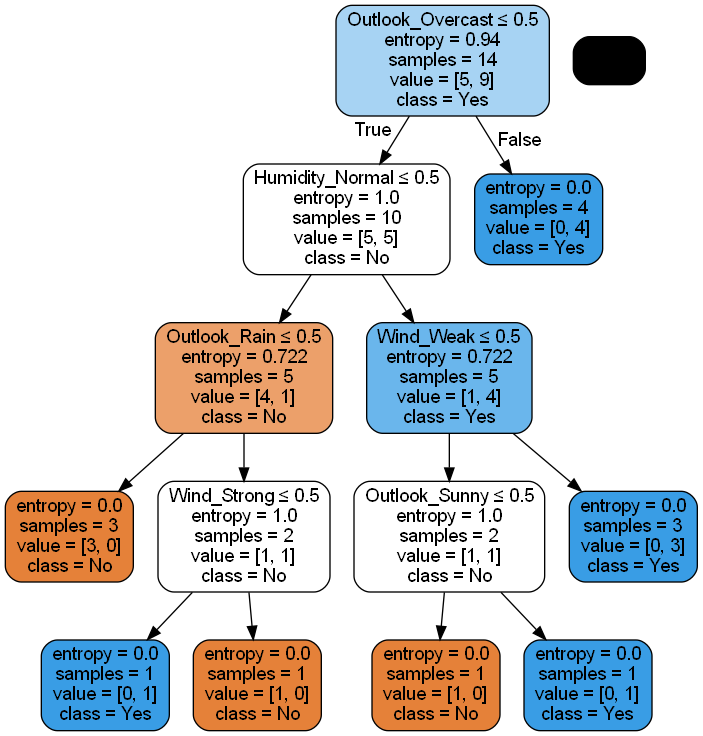

In [7]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

Podemos medir a acurácia testando quantas instâncias são classificadas corretamente. Observe que usamos todas as instâncias disponíveis no treinamento. A acurácia obtida foi 1, indicando que classificamos corretamente todos os exemplos de nosso conjunto.

In [8]:
# Usando modelo para classificar os dados que temos a disposição
y_pred = clf.predict(Xone_hot_data)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 1.0


# Trabalho de Árvore

## Separação dos dados

Vamos separar o conjunto em 60/40 e depois em 80/20, mantendo a seguinte nomenclatura:
1. _100: Conjunto separado em 100/0
2. _60: Conjunto separado em 60/40
3. _80: Conjunto separado em 80/20

In [9]:
from sklearn.model_selection import train_test_split

# Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste

# 100% dos dados serão usados para treinamento
X_train_100, X_test_100, y_train_100, y_test_100 = Xone_hot_data.copy(), Xone_hot_data.copy(), y.copy(), y.copy()

# 60% dos dados serão usados para treinamento
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(Xone_hot_data, y, test_size=0.4, random_state=1)

# 80% dos dados serão usados para treinamento
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(Xone_hot_data, y, test_size=0.2, random_state=1)

## Treinamento

In [10]:
def decision_tree(X_train, X_test, y_train, y_test, filename="arvore1.png", criterion="entropy"):
    # Cria o classificador de árvore de decisão
    clf = DecisionTreeClassifier(criterion=criterion, random_state=1)
    clf = clf.fit(X_train, y_train)

    # Classifica o treino e teste
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Mostra a acurácia
    acc = metrics.accuracy_score(y_train, y_pred_train), metrics.accuracy_score(y_test, y_pred_test)
    print(f'Acurácia no treinamento: {acc[0]}\nAcucácia no teste: {acc[1]}')

    # Mostra a árvore de decisão
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True,feature_names = X_train.columns,class_names=['No','Yes'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(filename)

    return {
        'graph': graph,
        'acc': (metrics.accuracy_score(y_train, y_pred_train), metrics.accuracy_score(y_test, y_pred_test))
    }

Se não houver separação, o conjunto de treinamento será o mesmo do conjunto de teste, então a acurácia será a mesma. Como o treinamento é feito para acertar o máximo de instâncias, a acurácia será 1. Essa árvore é a mesma da árvore gerada no exemplo anterior.

Acurácia no treinamento: 1.0
Acucácia no teste: 1.0


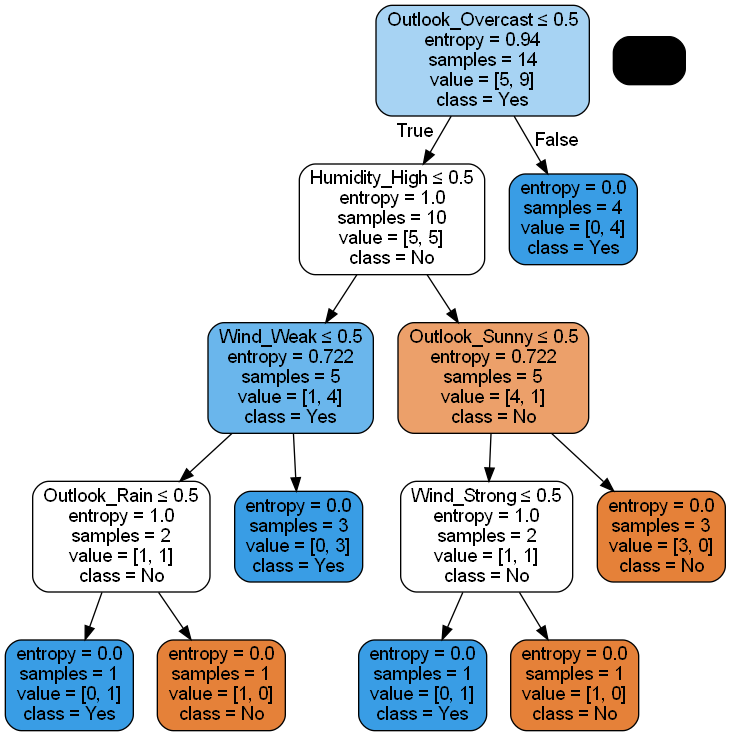

In [11]:
res_100 = decision_tree(X_train_100, X_test_100, y_train_100, y_test_100, 'arvore_100.png')
Image(res_100['graph'].create_png())

A acurácia de treinamento foi 1 e a acurácia de teste foi 2/3. Como temos 6 instâncias de teste, uma acurácia de 2/3 implica em acertar 4 instâncias.

Acurácia no treinamento: 1.0
Acucácia no teste: 0.6666666666666666


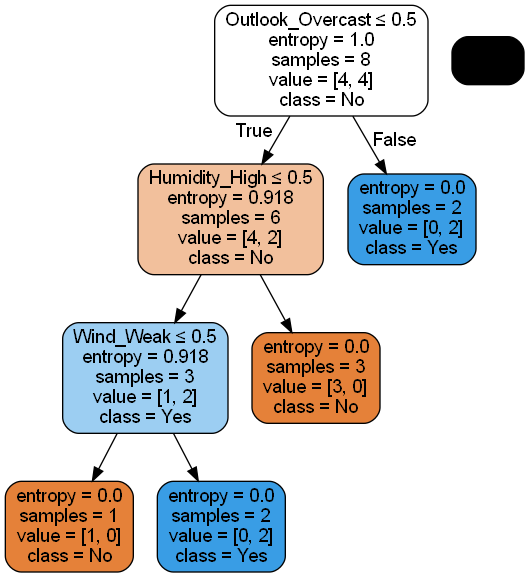

In [12]:
res_60 = decision_tree(X_train_60, X_test_60, y_train_60, y_test_60, 'arvore_60.png')
Image(res_60['graph'].create_png())

A acurácia de treinamento foi 1, como esperado. A acurácia de teste foi 2/3, indicando que, como haviam 3 instâncias de teste, acertamos 2. Por haver apenas 3 instâncias de teste, não podemos afirmar muito sobre o quão bom é esse modelo, pois uma pequena variação na separação dos dados pode alterar o resultado drasticamente.

Acurácia no treinamento: 1.0
Acucácia no teste: 0.6666666666666666


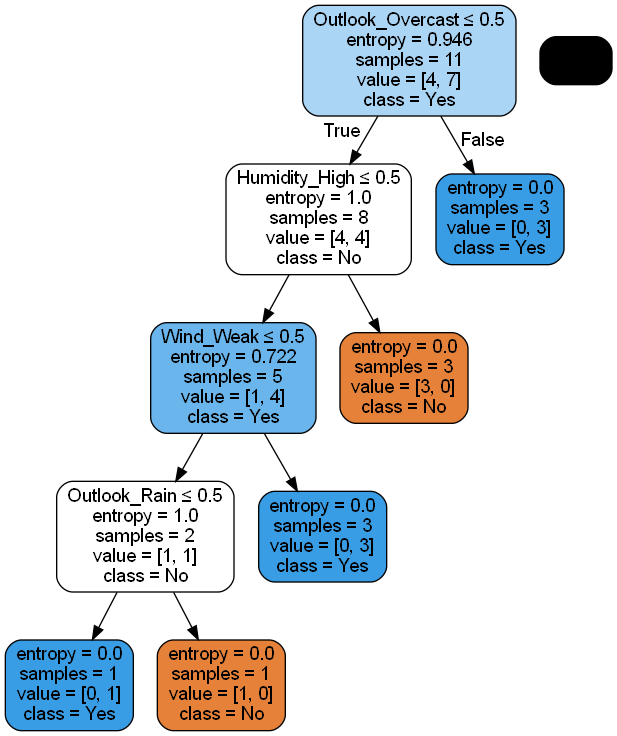

In [13]:
res_80 = decision_tree(X_train_80, X_test_80, y_train_80, y_test_80, 'arvore_80.png')
Image(res_80['graph'].create_png())

Comparando uma árvore com a outra é possível perceber que as árvores em que houve a separação são representações menores da árvore em que não houve, como se houvesse uma poda. Isso provavelmente se deve ao fato de que a árvore em que não houve a separação tem mais instâncias de treinamento, mas ainda são poucos. Então, ao separar parte dos dados, pode estar removendo instâncias com atributos que diferem do que sobrou no treinamento.

## Índice de Gini e Entropia

Gerando agora as árvores para os 3 conjuntos de dados, usando como função de seleção de atributo o índice de Gini:

Acurácia no treinamento: 1.0
Acucácia no teste: 1.0


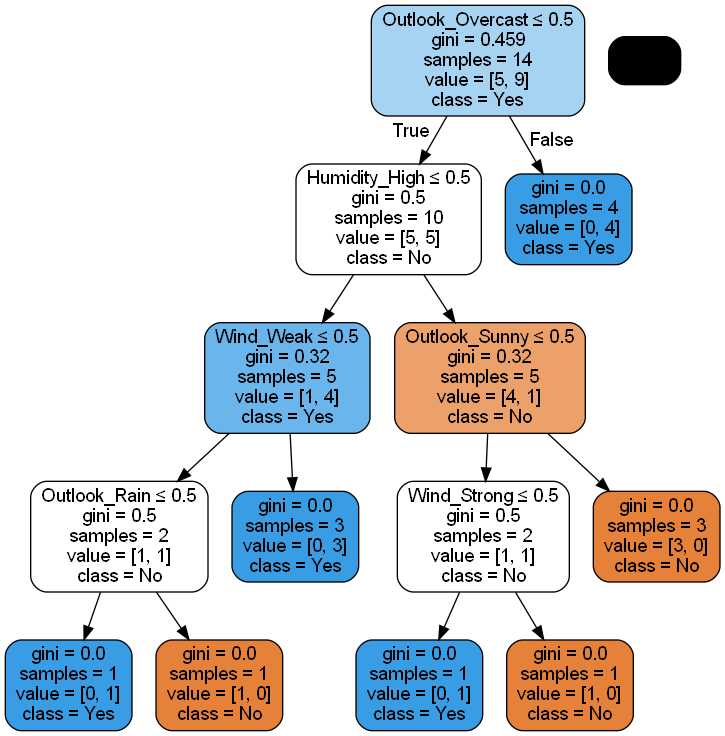

In [14]:
# Resultados usando gini para 100/0
res_100_gini = decision_tree(X_train_100, X_test_100, y_train_100, y_test_100, 'arvore_100_gini.png', 'gini')
Image(res_100_gini['graph'].create_png())

Acurácia no treinamento: 1.0
Acucácia no teste: 0.6666666666666666


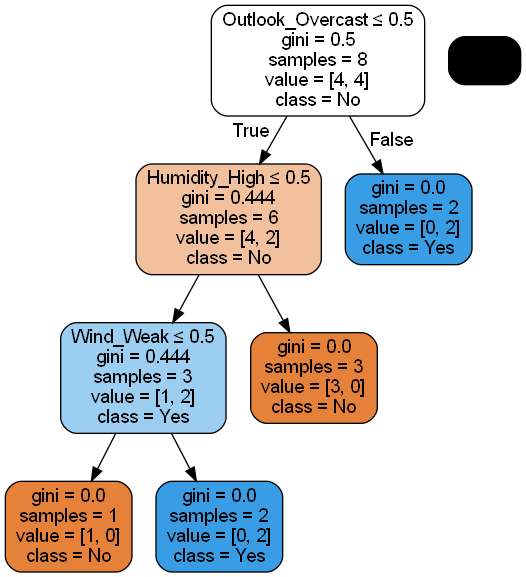

In [15]:
# Resultados usando gini para 60/40
res_60_gini = decision_tree(X_train_60, X_test_60, y_train_60, y_test_60, 'arvore_60_gini.png', 'gini')
Image(res_60_gini['graph'].create_png())

Acurácia no treinamento: 1.0
Acucácia no teste: 0.6666666666666666


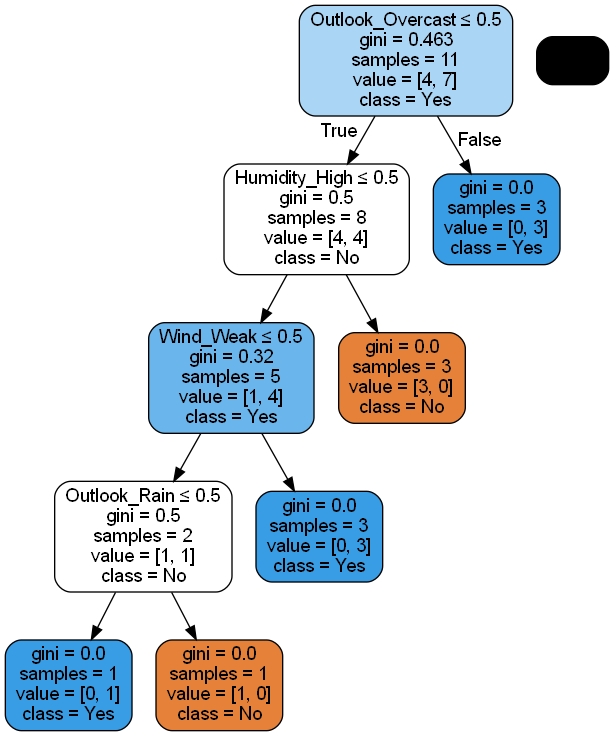

In [16]:
# Resultados usando gini para 80/20
res_80_gini = decision_tree(X_train_80, X_test_80, y_train_80, y_test_80, 'arvore_80_gini.png', 'gini')
Image(res_80_gini['graph'].create_png())

As árvores e acurácias obtidas foram as mesmas. Como há poucas instâncias, a diferença entre os indicadores de seleção de atributo é pequena, resultando em árvores iguais. 

In [22]:
print('Treinamento/Teste\tEntropia\t\t\tGini')
print(f'100%-0% \t\t{res_100["acc"]}\t\t\t{res_100_gini["acc"]}')
print(f'60%-40% \t\t{res_60["acc"]}\t{res_60_gini["acc"]}')
print(f'80%-20% \t\t{res_80["acc"]}\t{res_80_gini["acc"]}')

Treinamento/Teste	Entropia			Gini
100%-0% 		(1.0, 1.0)			(1.0, 1.0)
60%-40% 		(1.0, 0.6666666666666666)	(1.0, 0.6666666666666666)
80%-20% 		(1.0, 0.6666666666666666)	(1.0, 0.6666666666666666)


## K-Fold

In [18]:
from sklearn.model_selection import KFold
import numpy as np

def kfold_mean_acc(X, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    accTrain = []
    accTest = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(random_state=1)
        clf = clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
        accTrain.append(metrics.accuracy_score(y_train, y_pred_train))
        accTest.append(metrics.accuracy_score(y_test, y_pred_test))
    return np.mean(accTrain), np.mean(accTest)

In [19]:
print('\t3-fold\t\t\t\t8-fold\t\t\t\t14-fold')
print('Treinamento\tTeste\t\tTreinamento\tTeste\t\tTreinamento\tTeste')
for k in [3, 8, 14]:
    accTrain, accTest = kfold_mean_acc(Xone_hot_data, y, k)
    print(f'\t{accTrain}\t{accTest}', end='\t\t')

	3-fold				8-fold				14-fold
Treinamento	Teste		Treinamento	Teste		Treinamento	Teste
	1.0	0.5			1.0	0.5625			1.0	0.5714285714285714		

A acurácia de treinamento foi 1 em todos, o que continuou sendo o esperado. A acurácia começou em 50% e subiu até 57%, mostrando que, quanto maior o valor de $k$, maior a acurácia. No KMeans, quanto maior for $k$, a tendência é que a acurácia seja maior mas leve mais tempo para treinar o modelo.